In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
from sklearn import (
    model_selection,
    preprocessing,
)
b = load_boston()
bos_X = pd.DataFrame(
    b.data, columns=b.feature_names
)
bos_y = b.target
bos_X_train, bos_X_test, bos_y_train, bos_y_test = model_selection.train_test_split(
    bos_X,
    bos_y,
    test_size=0.3,
    random_state=42,
)
bos_sX = preprocessing.StandardScaler().fit_transform(
    bos_X
)
bos_sX_train, bos_sX_test, bos_sy_train, bos_sy_test = model_selection.train_test_split(
    bos_sX,
    bos_y,
    test_size=0.3,
    random_state=42,
)

In [2]:
from sklearn.dummy import DummyRegressor
dr = DummyRegressor()
dr.fit(bos_X_train, bos_y_train)
dr.score(bos_X_test, bos_y_test)

-0.03469753992352409

In [3]:
from sklearn.linear_model import (
    LinearRegression,
)
lr = LinearRegression()
lr.fit(bos_X_train, bos_y_train)
lr.score(bos_X_test, bos_y_test)
lr.coef_

array([-1.33470103e-01,  3.58089136e-02,  4.95226452e-02,  3.11983512e+00,
       -1.54170609e+01,  4.05719923e+00, -1.08208352e-02, -1.38599824e+00,
        2.42727340e-01, -8.70223437e-03, -9.10685208e-01,  1.17941159e-02,
       -5.47113313e-01])

In [29]:
lr2 = LinearRegression()
lr2.fit(bos_sX_train, bos_sy_train)
lr2.score(bos_sX_test, bos_sy_test)
lr2.intercept_
lr2.coef_

array([-1.14691411,  0.83432605,  0.33940694,  0.79163612, -1.784727  ,
        2.84783949, -0.30429306, -2.91562521,  2.11140045, -1.46519951,
       -1.9696347 ,  1.07567771, -3.90310727])

FeatureImportances(absolute=False,
                   ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001D9B33B8E10>,
                   colormap=None, colors=None, is_fitted='auto',
                   labels=Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object'),
                   model=None, relative=True, stack=False, xlabel=None)

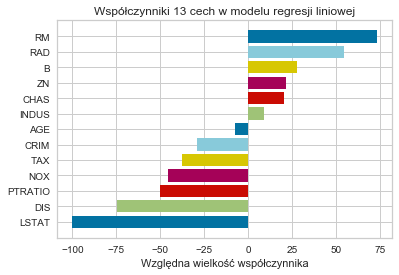

In [5]:
from yellowbrick.features import (
    FeatureImportances,
)
fig, ax = plt.subplots(figsize=(6, 4))
ax.set(title="Współczynniki 13 cech w modelu regresji liniowej", xlabel="Względna wielkość współczynnika")
fi_viz = FeatureImportances(
    lr2, labels=bos_X.columns, 
)
fi_viz.fit(bos_sX, bos_y)
# #fig.savefig(
#     "images/mlpr_1401.png",
#     bbox_inches="tight",
#     dpi=300,
# )

In [30]:
from sklearn.svm import SVR
svr = SVR(gamma='auto')
svr.fit(bos_sX_train, bos_sy_train)
svr.score(bos_sX_test, bos_sy_test)

0.6553772022206867

In [8]:
from sklearn.neighbors import (
    KNeighborsRegressor,
)
knr = KNeighborsRegressor()
knr.fit(bos_sX_train, bos_sy_train)
knr.score(bos_sX_test, bos_sy_test)

0.7476242635592417

In [9]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(bos_X_train, bos_y_train)
dtr.score(bos_X_test, bos_y_test)

0.8559207694719114

In [54]:
import pydotplus
from io import StringIO
from sklearn.tree import export_graphviz
dot_data = StringIO()
export_graphviz(
    dtr,
    out_file=dot_data,
    feature_names=bos_X.columns,
    filled=True,
)
d = dot_data.getvalue().replace("nsamples", "npróbki") \
                       .replace("nvalue", "nwartość") \
                       .replace("True", "tak") \
                       .replace("False", "nie")
g = pydotplus.graph_from_dot_data(d)
#g.write_png("images/mlpr_1402.png")

In [55]:
from IPython.display import Image
Image(g.create_png())

In [56]:
dot_data = StringIO()
export_graphviz(
    dtr,
    max_depth=2,
    out_file=dot_data,
    feature_names=bos_X.columns,
    filled=True,
)
d = dot_data.getvalue().replace("nsamples", "npróbki") \
                       .replace("nvalue", "nwartość") \
                       .replace("True", "tak") \
                       .replace("False", "nie")
g = pydotplus.graph_from_dot_data(d)
#g.write_png("images/mlpr_1403.png")

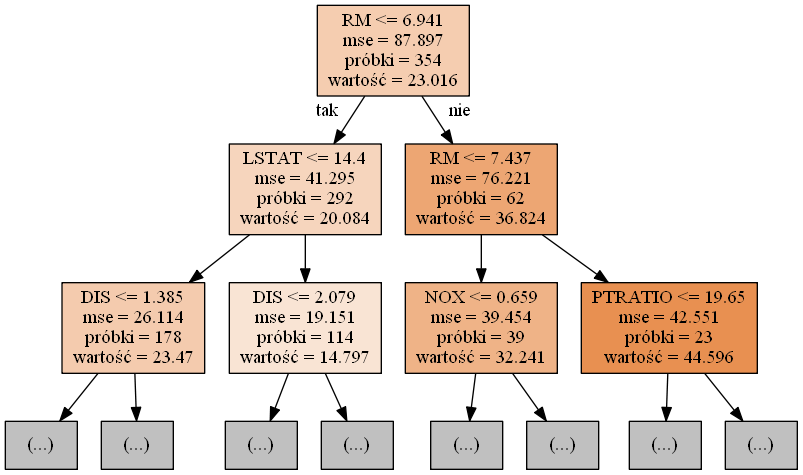

In [57]:
from IPython.display import Image
Image(g.create_png())

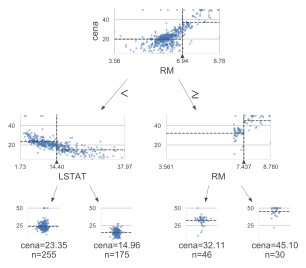

In [12]:
import dtreeviz.trees
dtr3 = DecisionTreeRegressor(max_depth=2)
dtr3.fit(bos_X_train, bos_y_train)
viz = dtreeviz.trees.dtreeviz(
    dtr3,
    bos_X,
    bos_y,
    target_name="cena",
    feature_names=bos_X.columns,
)
viz

In [13]:
for col, val in sorted(
    zip(
        bos_X.columns, dtr.feature_importances_
    ),
    key=lambda x: x[1],
    reverse=True,
)[:5]:
    print(f"{col:10}{val:10.3f}")

RM             0.576
LSTAT          0.192
DIS            0.111
CRIM           0.035
NOX            0.029


In [14]:
from sklearn.ensemble import (
    RandomForestRegressor,
)
rfr = RandomForestRegressor(
    random_state=42, n_estimators=100
)
rfr.fit(bos_X_train, bos_y_train)
rfr.score(bos_X_test, bos_y_test)

0.8721182042634867

In [15]:
for col, val in sorted(
    zip(
        bos_X.columns, rfr.feature_importances_
    ),
    key=lambda x: x[1],
    reverse=True,
)[:5]:
    print(f"{col:10}{val:10.3f}")

RM             0.439
LSTAT          0.380
DIS            0.067
CRIM           0.032
PTRATIO        0.020


In [32]:
import xgboost as xgb
xgr = xgb.XGBRegressor(random_state=42)
xgr.fit(bos_X_train, bos_y_train)
xgr.score(bos_X_test, bos_y_test)
xgr.predict(bos_X.iloc[[0]])

[09:49:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([27.013563], dtype=float32)

In [17]:
for col, val in sorted(
    zip(
        bos_X.columns, xgr.feature_importances_
    ),
    key=lambda x: x[1],
    reverse=True,
)[:5]:
    print(f"{col:10}{val:10.3f}")

LSTAT          0.485
RM             0.263
PTRATIO        0.060
NOX            0.051
DIS            0.032


[Text(0, 0.5, 'Cecha'),
 Text(0.5, 0, 'Ocena F'),
 Text(0.5, 1.0, 'Wykres ważności cech')]

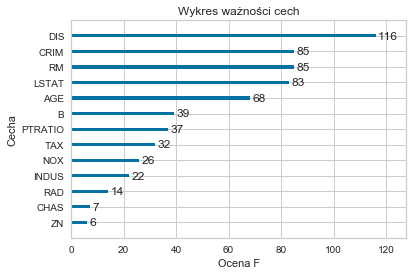

In [33]:
fig, ax = plt.subplots(figsize=(6, 4))
xgb.plot_importance(xgr, ax=ax)
ax.set(title="Wykres ważności cech", xlabel="Ocena F", ylabel="Cecha")
#fig.savefig("images/mlpr_1405.png", dpi=300)

FeatureImportances(absolute=False,
                   ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001D9B8BB4BA8>,
                   colormap=None, colors=None, is_fitted='auto', labels=None,
                   model=None, relative=True, stack=False, xlabel=None)

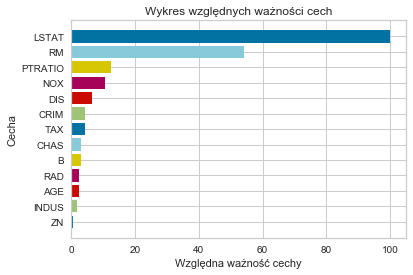

In [37]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.set(title="Wykres względnych ważności cech", xlabel="Względna ważność cechy", ylabel="Cecha")
fi_viz = FeatureImportances(xgr)
fi_viz.fit(bos_X_train, bos_y_train)
#fig.savefig("images/mlpr_1406.png", dpi=300)

In [20]:
booster = xgr.get_booster()
print(booster.get_dump()[0])

0:[LSTAT<7.86499977] yes=1,no=2,missing=1
	1:[RM<7.43700027] yes=3,no=4,missing=3
		3:[RM<6.65649986] yes=7,no=8,missing=7
			7:leaf=2.42512202
			8:leaf=3.10899997
		4:[CRIM<2.74223518] yes=9,no=10,missing=9
			9:leaf=4.31652212
			10:leaf=1.07000005
	2:[LSTAT<16.0849991] yes=5,no=6,missing=5
		5:[B<47.7250023] yes=11,no=12,missing=11
			11:leaf=0.86499995
			12:leaf=2.11871624
		6:[DIS<1.94000006] yes=13,no=14,missing=13
			13:leaf=1.06833339
			14:leaf=1.57500005



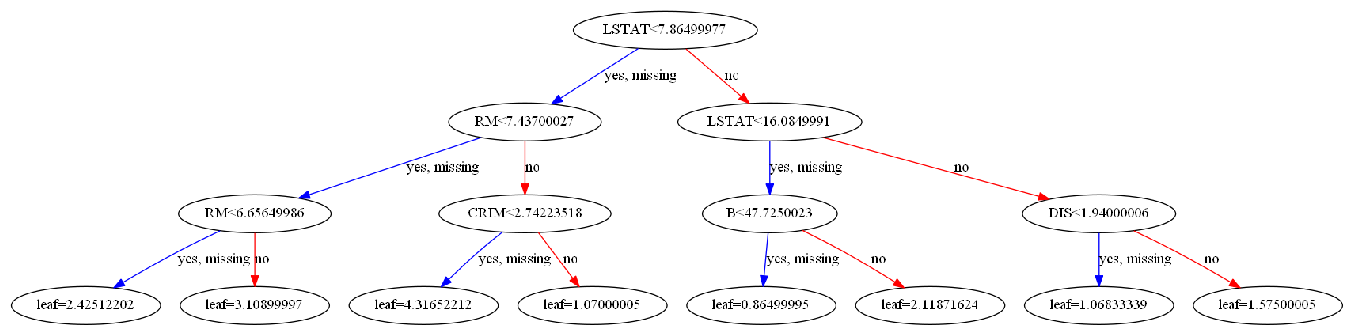

In [52]:
fig, ax = plt.subplots(figsize=(24, 16))
xgb.plot_tree(xgr, ax=ax, num_trees=0)
fig.savefig('images/mlpr_1407.png', dpi=300)

In [40]:
import lightgbm as lgb
lgr = lgb.LGBMRegressor(random_state=42)
lgr.fit(bos_X_train, bos_y_train)
lgr.score(bos_X_test, bos_y_test)
lgr.predict(bos_X.iloc[[0]])

0.847729219534575

In [23]:
for col, val in sorted(
    zip(
        bos_X.columns, lgr.feature_importances_
    ),
    key=lambda x: x[1],
    reverse=True,
)[:5]:
    print(f"{col:10}{val:10.3f}")

LSTAT        226.000
RM           199.000
DIS          172.000
AGE          130.000
B            121.000


[Text(0.0, 0.5, 'Cecha'),
 Text(0.5, 16.0, 'Ważność cechy'),
 Text(0.5, 1, 'Wykres ważności cech')]

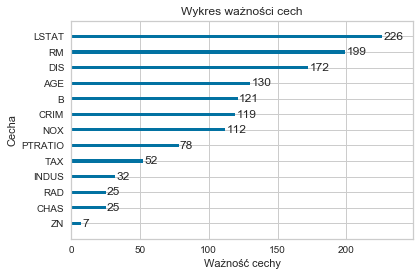

In [46]:
fig, ax = plt.subplots(figsize=(6, 4))
lgb.plot_importance(lgr, ax=ax)
fig.tight_layout()
ax.set(title="Wykres ważności cech", xlabel="Ważność cechy", ylabel="Cecha")
#fig.savefig("images/mlpr_1408.png", dpi=300)

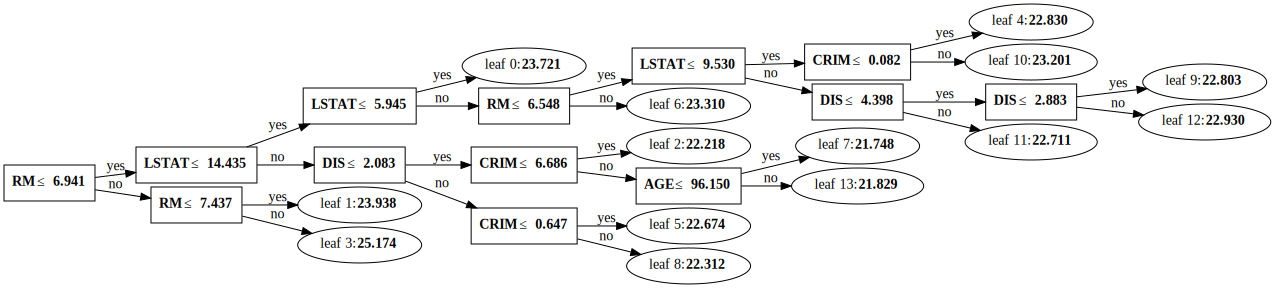

In [48]:
lgb.create_tree_digraph(lgr)